In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect
from sqlalchemy import func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with= engine)


In [13]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)




# Exploratory Precipitation Analysis

In [16]:
# look at first row to see columns etc
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x151ecfa10>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0}

In [17]:
# Find the most recent date in the data set.
most_recent_date =(session.query(Measurement.date)
             .order_by(Measurement.date.desc())
                .first())
most_recent_date
print(most_recent_date)

('2017-08-23',)


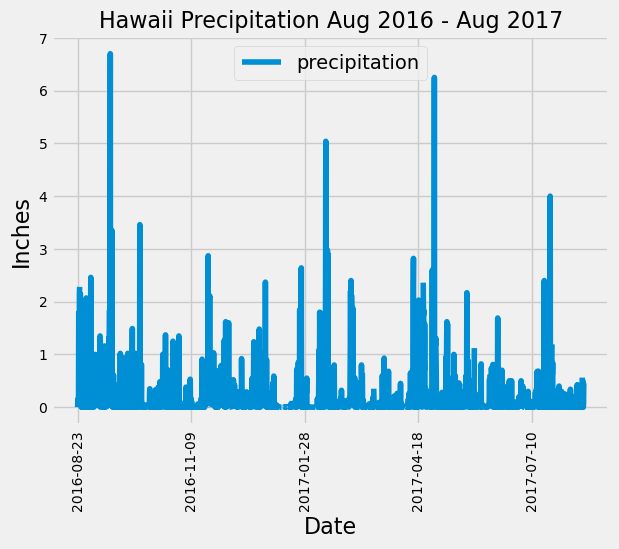

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_date
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter\
(Measurement.date >= one_year_date).order_by(Measurement.date).all()
results

# Save the query results as a Pandas DataFrame. Explicitly set the column names
hawaii_df = pd.DataFrame(results, columns =['date', 'precipitation'])
hawaii_df.head()
# Sort the dataframe by date
hawaii_df.set_index(hawaii_df['date'], inplace =True)
hawaii_df
# hawaii_df = hawaii_df.drop('date', axis=1)
# hawaii_df
# Use Pandas Plotting with Matplotlib to plot the data
hawaii_df.plot('date', 'precipitation')


plt.xlabel("Date",  size = 16)
plt.ylabel("Inches", size = 16)
plt.title("Hawaii Precipitation Aug 2016 - Aug 2017", size = 16)
plt.legend(["precipitation"],loc='upper center')
plt.xticks(rotation=90, size = 10)
plt.yticks(size = 10)
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
hawaii_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# look at first row to see columns etc
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x151ecfa10>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0}

In [21]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.id).count()
total_stations

9

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs))\
.filter(Measurement.station=='USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

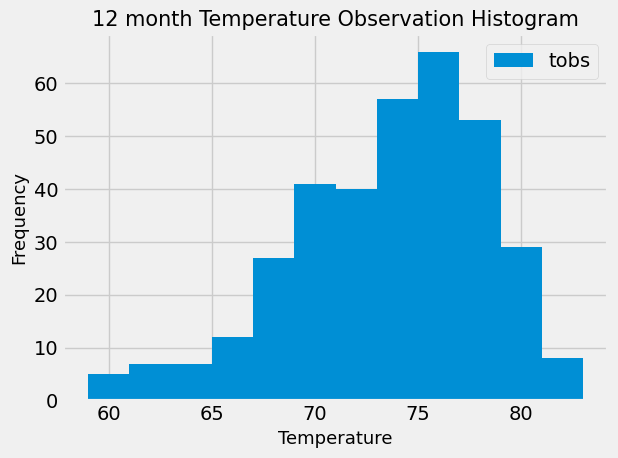

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_results = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
    .filter(Measurement.date>='2016-08-23').all()


active_station=pd.DataFrame(active_results,columns=['tobs'])
active_station.plot.hist(bins=12)
plt.title("12 month Temperature Observation Histogram", size=15)
plt.xlabel("Temperature", size=13)
plt.ylabel("Frequency", size=13)

plt.tight_layout()
plt.show()


# Close Session

In [25]:
# Close Session
session.close()